In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/Diabetes (1).csv')

print("Информация о датасете:")
print(data.info())
print("\nПервые строки данных:")
print(data.head())

print("\nКоличество пропущенных значений:")
print(data.isnull().sum())

data.fillna(data.median(), inplace=True)

duplicates = data.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")
if duplicates > 0:
    data.drop_duplicates(inplace=True)

for column in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]



print("\nТипы данных после обработки:")
print(data.dtypes)



print("\nДанные после удаления выбросов:")
print(data.describe())


print("\nОписательная статистика:")
print(data.describe())


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Первые строки данных:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66       

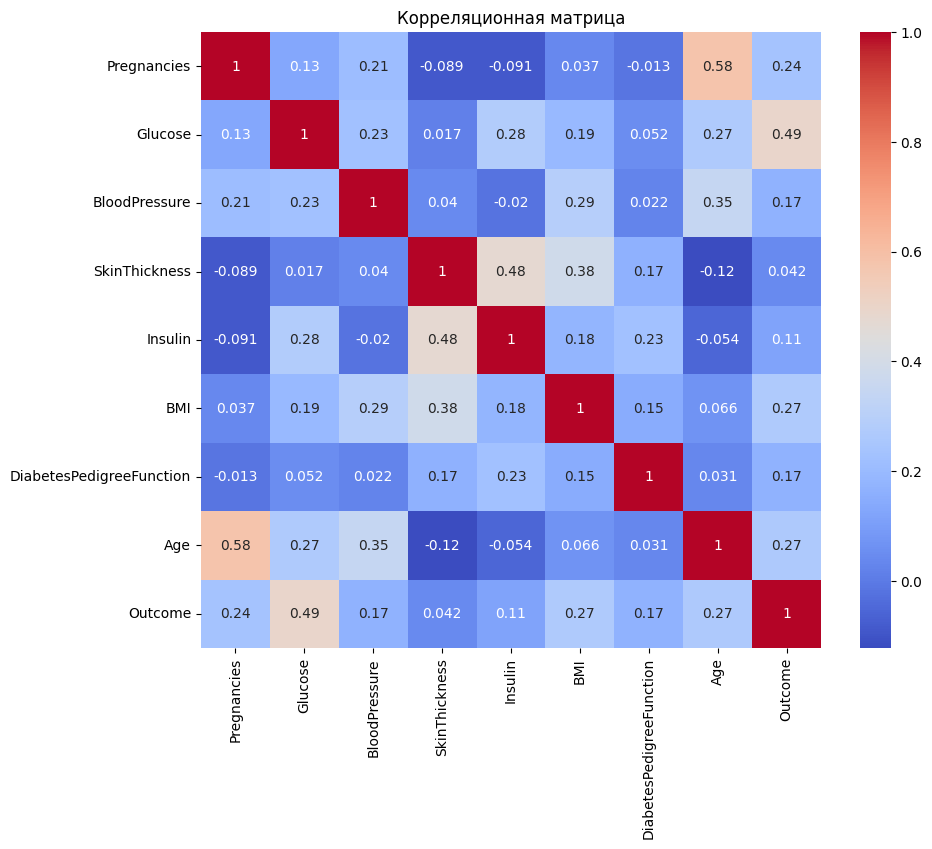

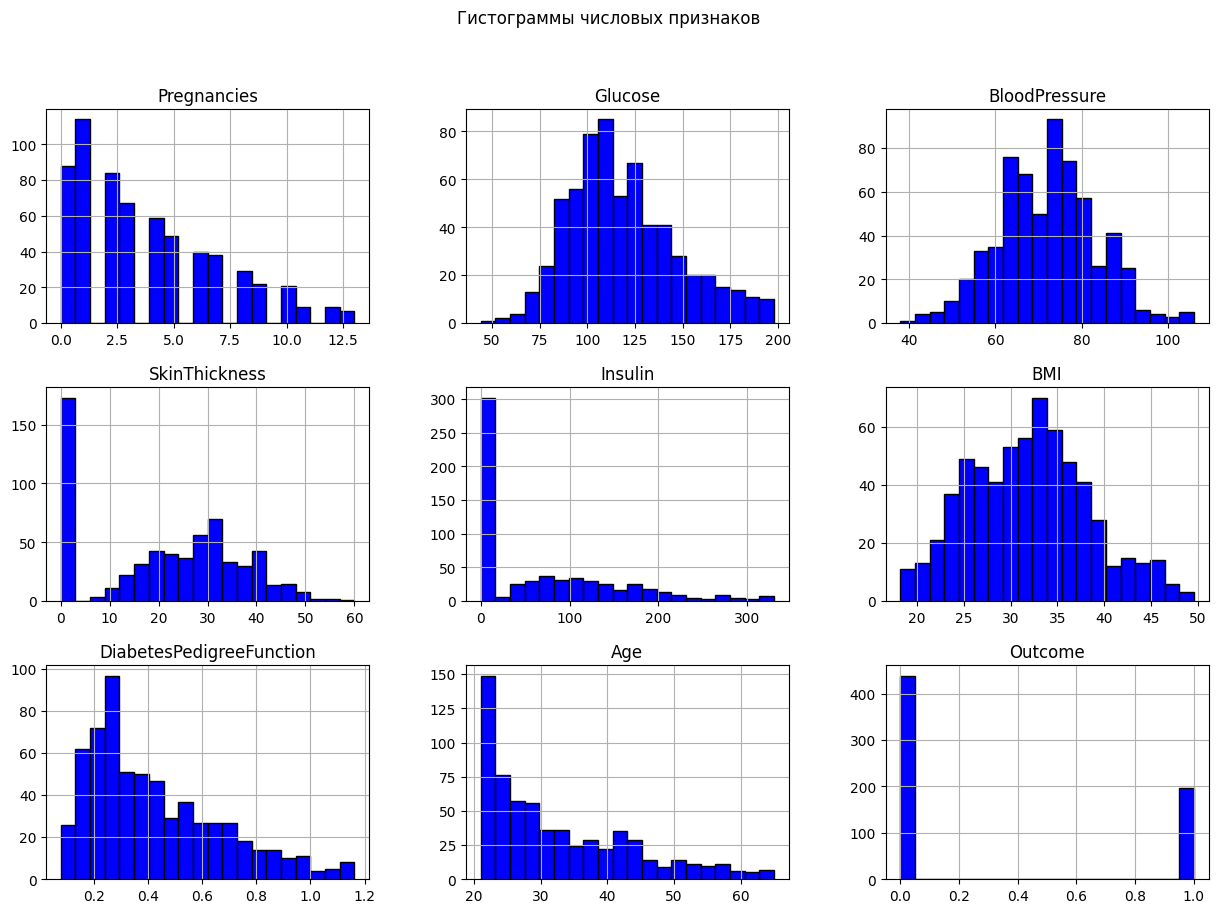

In [5]:
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\nЧастотный анализ для {column}:")
    print(data[column].value_counts())

corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()

data.hist(bins=20, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle("Гистограммы числовых признаков")
plt.show()



In [6]:
data['BMI_Ratio'] = data['BMI'] / (data['Age'] + 1)  # Простая трансформация

filtered_data = data[data['Glucose'] > 120].sort_values(by='Age', ascending=True)
print("\nОтфильтрованные данные (Glucose > 120):")
print(filtered_data.head())


Отфильтрованные данные (Glucose > 120):
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
627            0      132             78              0        0  32.4   
94             2      142             82             18       64  24.7   
736            0      126             86             27      120  27.4   
713            0      134             58             20      291  26.4   
307            0      137             68             14      148  24.8   

     DiabetesPedigreeFunction  Age  Outcome  BMI_Ratio  
627                     0.393   21        0   1.472727  
94                      0.761   21        0   1.122727  
736                     0.515   21        0   1.245455  
713                     0.352   21        0   1.200000  
307                     0.143   21        0   1.127273  



Сводная таблица:
Pregnancies        0         1         2         3         4         5   \
Age                                                                       
21           0.111111  0.052632  0.076923  0.000000  0.000000  0.000000   
22           0.250000  0.000000  0.000000  0.142857  0.333333  0.000000   
23           0.285714  0.000000  0.333333  0.500000  0.000000  0.000000   
24           0.375000  0.083333  0.111111  0.333333  0.000000  0.000000   
25           0.166667  0.000000  0.100000  0.375000  0.000000  0.666667   
26           0.166667  0.000000  0.000000  0.200000  0.500000  0.000000   
27           0.000000  0.333333  0.250000  0.250000  0.333333  0.250000   
28           1.000000  0.142857  0.333333  0.500000  0.000000  0.000000   
29           0.000000  0.333333  0.250000  0.500000  0.200000  1.000000   
30           0.000000  0.333333  1.000000  0.250000  0.250000  0.000000   
31           0.333333  0.000000  0.000000  1.000000  0.750000  0.000000   
32     

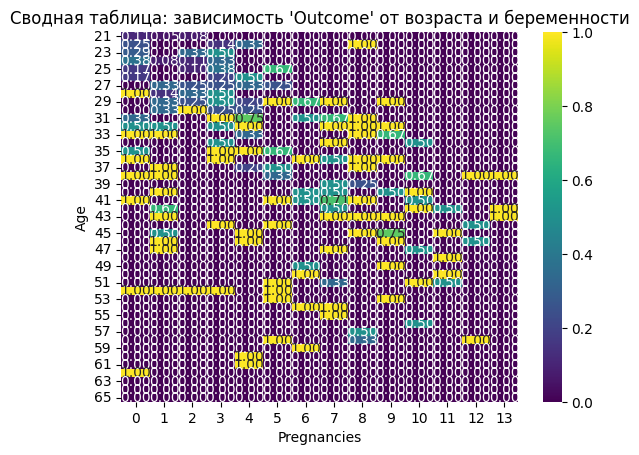

In [10]:
pivot_table = data.pivot_table(values='Outcome', index='Age', columns='Pregnancies', aggfunc='mean', fill_value=0)
print("\nСводная таблица:")
print(pivot_table)

sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='viridis')
plt.title("Сводная таблица: зависимость 'Outcome' от возраста и беременности")
plt.show()